In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mplt
import random
from math import *
import sklearn as svm
import seaborn as sns
%matplotlib inline
import pickle
from sklearn.svm import SVC

We will analyse the california housing database. Lets import the databse

In [3]:
database = pd.read_csv('/content/sample_data/california_housing_test.csv')
database.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0

In [4]:
housing_data = pd.DataFrame(database)
housing_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0

Lets see some main factors of the dataframe, to see what we can work with

In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [6]:
housing_data.describe()

longitude    latitude  housing_median_age   total_rooms  \
count  3000.000000  3000.00000         3000.000000   3000.000000   
mean   -119.589200    35.63539           28.845333   2599.578667   
std       1.994936     2.12967           12.555396   2155.593332   
min    -124.180000    32.56000            1.000000      6.000000   
25%    -121.810000    33.93000           18.000000   1401.000000   
50%    -118.485000    34.27000           29.000000   2106.000000   
75%    -118.020000    37.69000           37.000000   3129.000000   
max    -114.490000    41.92000           52.000000  30450.000000   

       total_bedrooms    population  households  median_income  \
count     3000.000000   3000.000000  3000.00000    3000.000000   
mean       529.950667   1402.798667   489.91200       3.807272   
std        415.654368   1030.543012   365.42271       1.854512   
min          2.000000      5.000000     2.00000       0.499900   
25%        291.000000    780.000000   273.00000       2.544000   
50%        437.000000   1155.000000   409.50000       3.487150   
75%        636.000000   1742.750000   597.25000       4.656475   
max       5419.000000  11935.000000  4930.00000      15.000100   

       median_house_value  
count          3000.00000  
mean         205846.27500  
std          113119.68747  
min           22500.00000  
25%          121200.00000  
50%          177650.00000  
75%          263975.00000  
max          500001.00000

Lets see some basic plots that we can have. for this we are going to use seaborn.

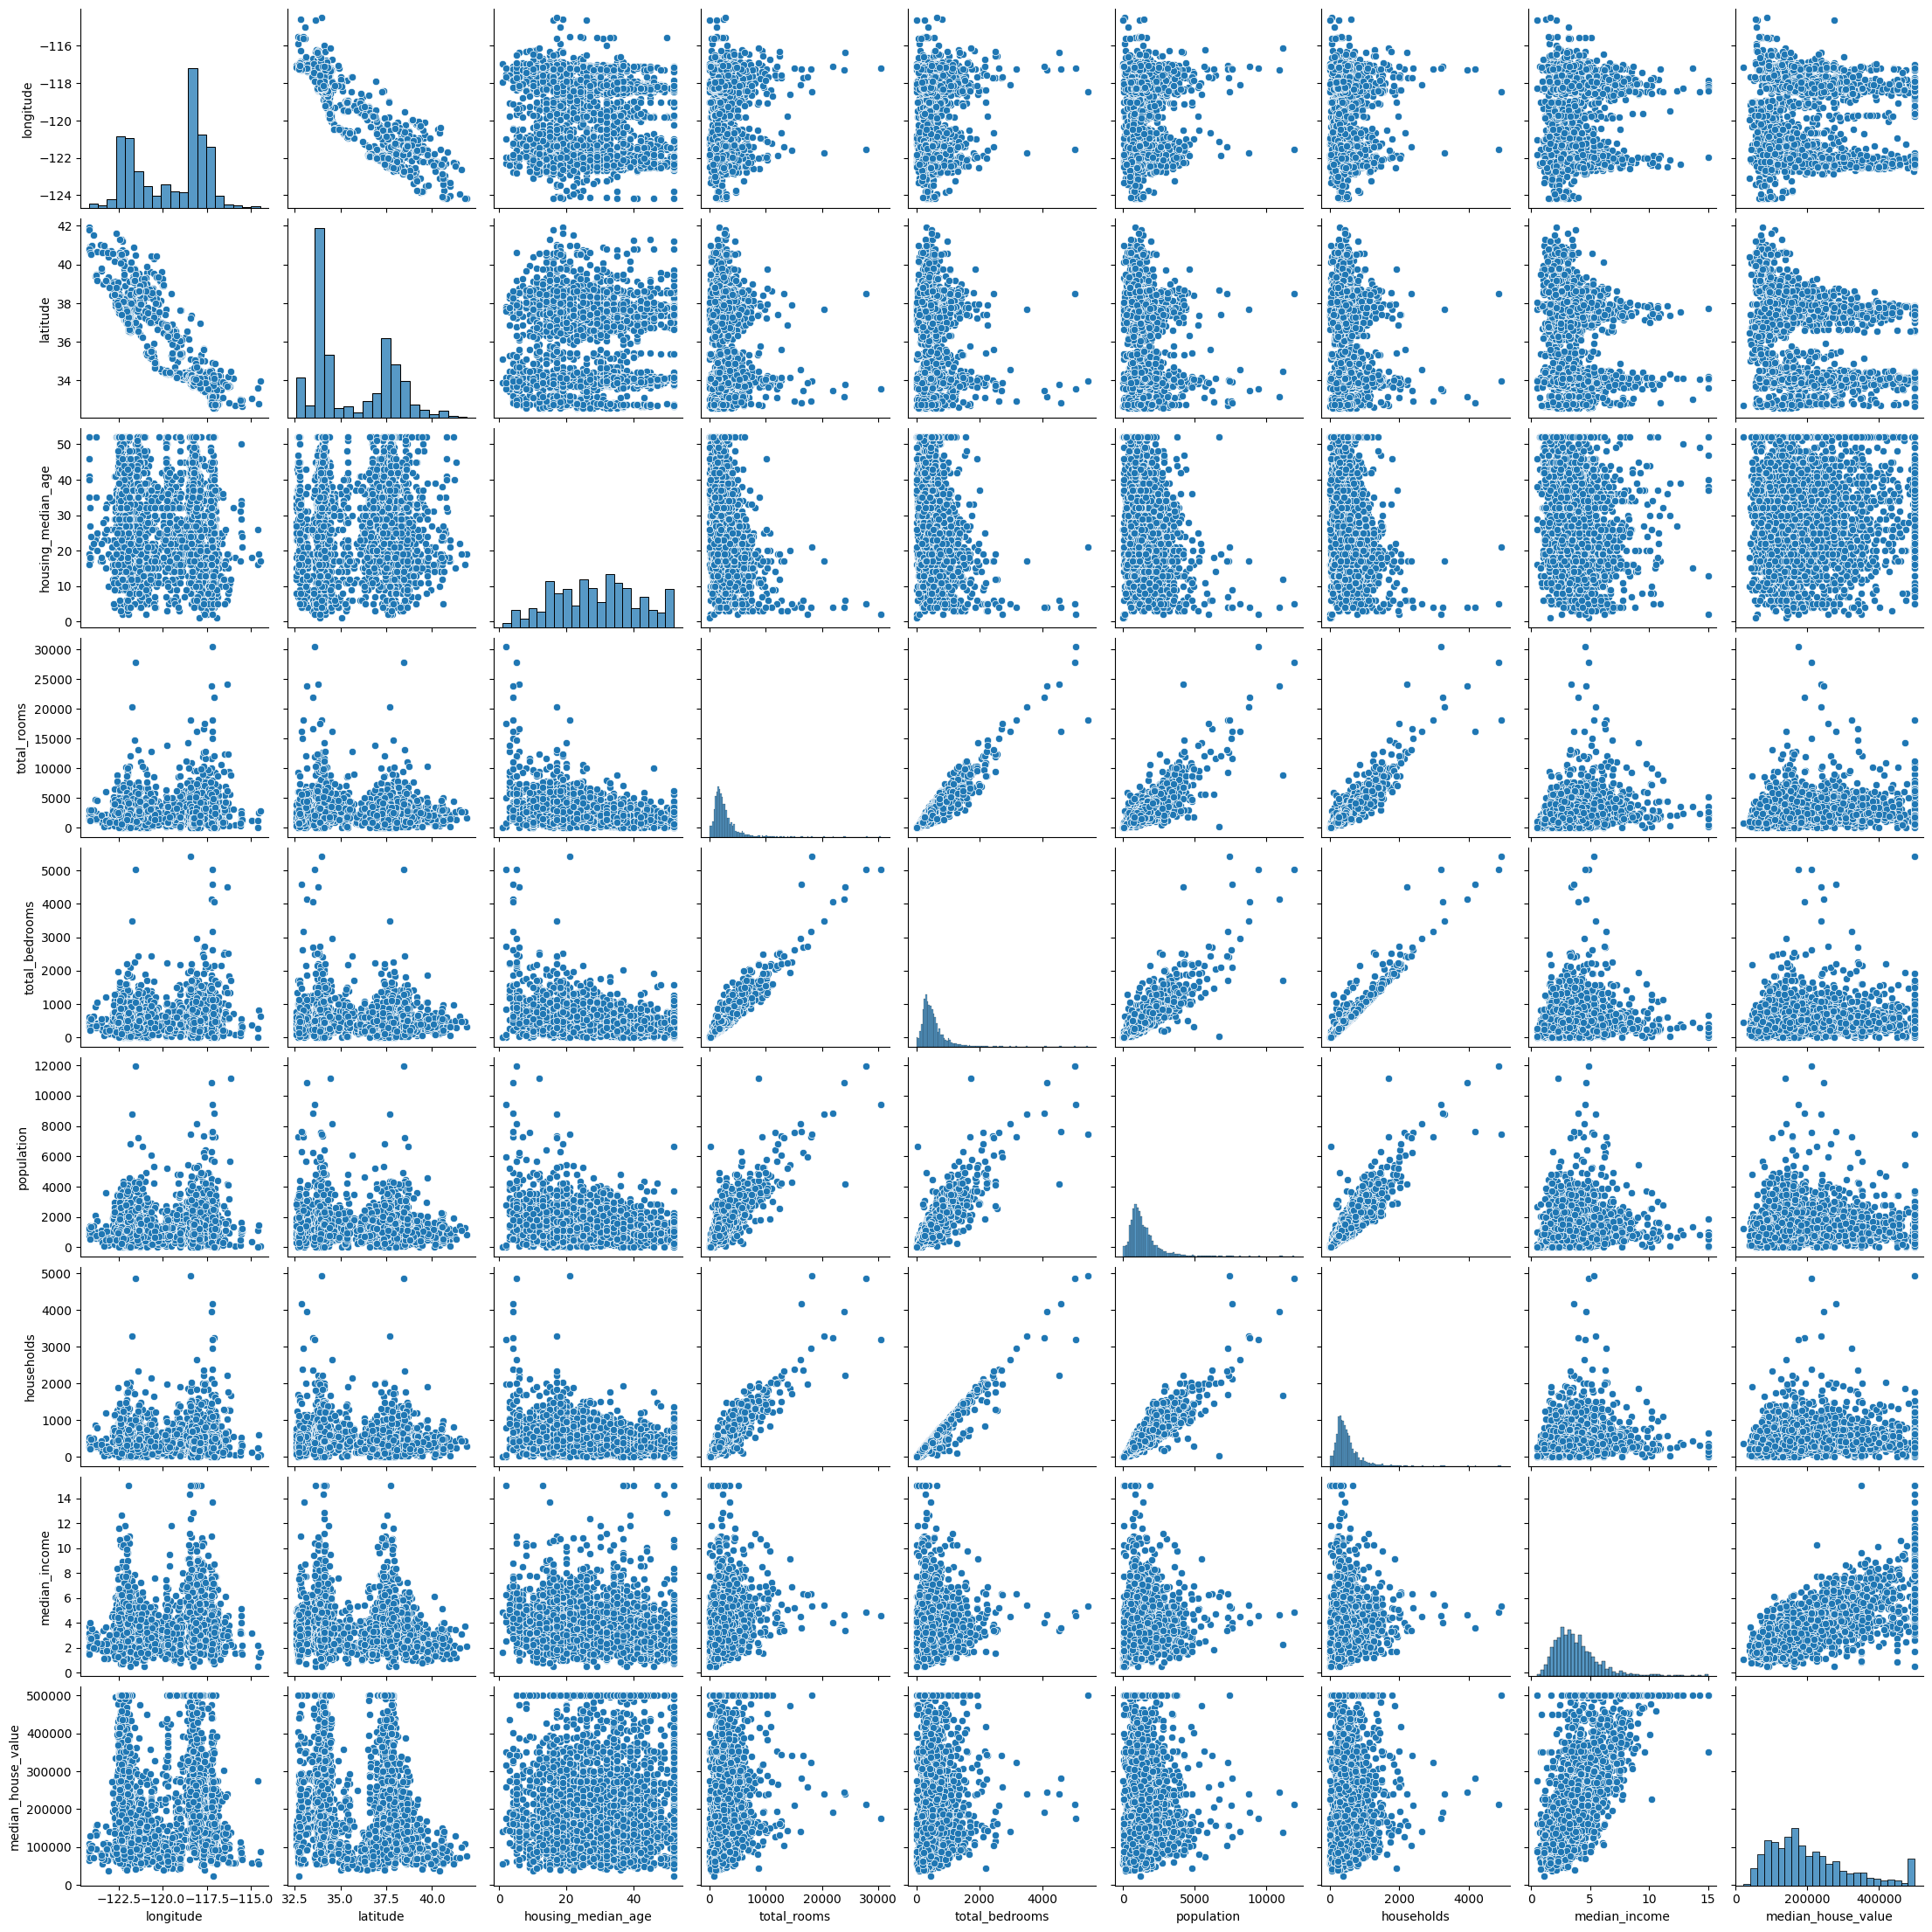

In [7]:
sns.pairplot(housing_data)

Lets see what columns we have in order to know what data we can match with each other.

In [8]:
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

Lets explore the following:

1.   Total rooms vs housing median age: does it correlate?
2.   Median income vs total bedrooms: does really having more money means bigger house?

<function matplotlib.pyplot.show(close=None, block=None)>

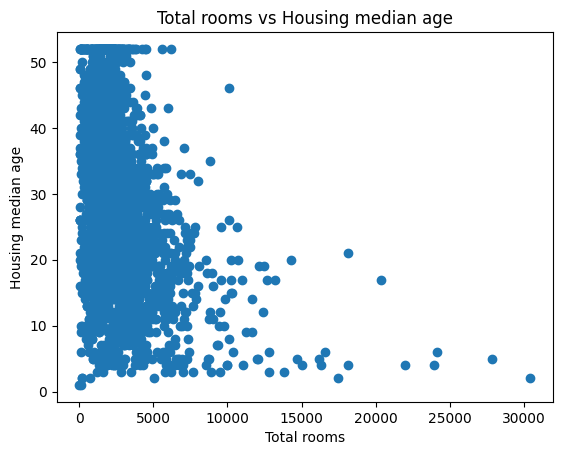

In [10]:
# Total rooms vs Housing median age

total_rooms = housing_data['total_rooms']
housing_median_age = housing_data['housing_median_age']
plt.scatter(total_rooms, housing_median_age)
plt.title('Total rooms vs Housing median age')
plt.xlabel('Total rooms')
plt.ylabel('Housing median age')
plt.show

LEts see now how many rooms there are per housing median age. for this we are going to use a histogram.

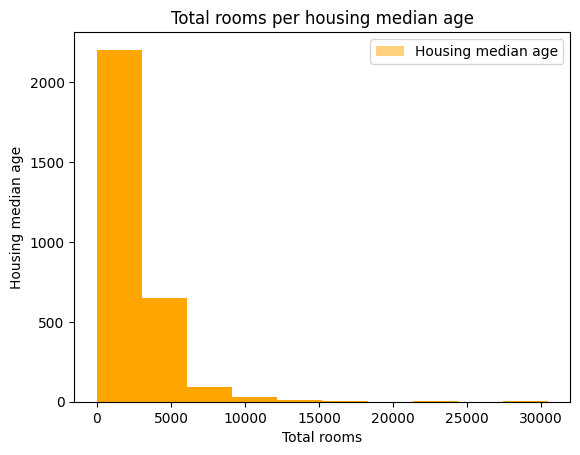

In [26]:
rooms = housing_data['total_rooms']
housing_median_age = housing_data['housing_median_age']
plt.hist(rooms, color = "orange")
plt.hist(housing_median_age, color = "orange", label='Housing median age', alpha=0.5)
plt.title('Total rooms per housing median age')
plt.xlabel('Total rooms')
plt.ylabel('Housing median age')
plt.legend(loc = "upper right")

Above we can see that total bedroom and total rooms incrases linearly. Lets check thast using a scatter plot

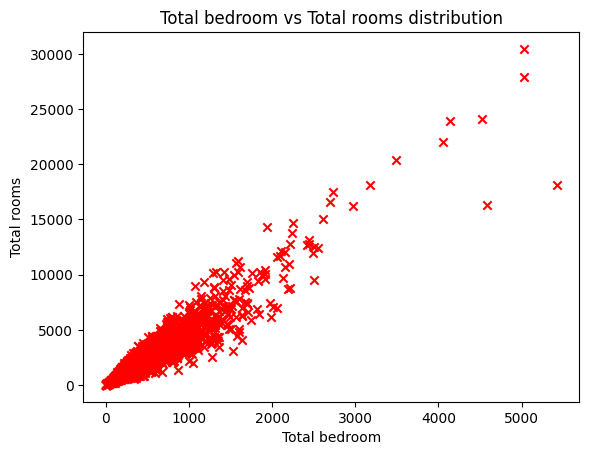

In [31]:
total_bedroom = housing_data['total_bedrooms']
total_rooms = housing_data['total_rooms']

plt.scatter(total_bedroom, total_rooms, color = "red", marker = "x")
plt.title('Total bedroom vs Total rooms distribution')
plt.xlabel('Total bedroom')
plt.ylabel('Total rooms')
plt.show()

LEts check again all the columns we have to make some more plots

In [32]:
columns = housing_data.columns
columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

LEts make a plot comparing:
Longitude and the housing median age

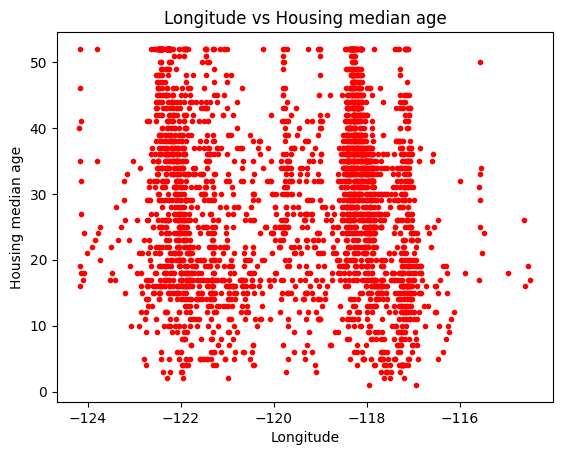

In [33]:
longitude  = housing_data['longitude']
housing_median_age = housing_data['housing_median_age']

plt.scatter(longitude, housing_median_age, color = "red", marker = ".")
plt.title('Longitude vs Housing median age')
plt.xlabel('Longitude')
plt.ylabel('Housing median age')
plt.show()

Now latitude vs housing median age

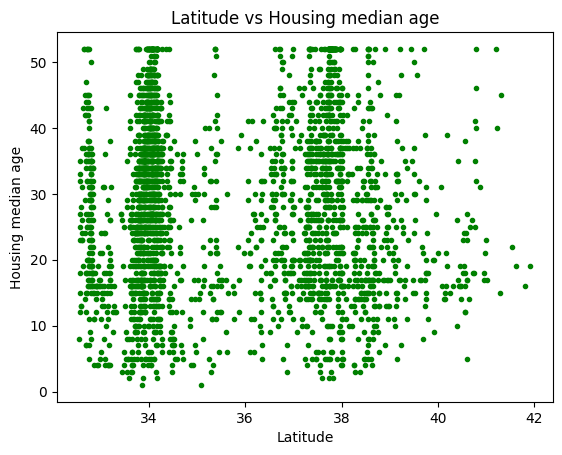

In [34]:
latitude = housing_data['latitude']
housing_median_age = housing_data['housing_median_age']

plt.scatter(latitude, housing_median_age, color = "green", marker = ".")
plt.title('Latitude vs Housing median age')
plt.xlabel('Latitude')
plt.ylabel('Housing median age')
plt.show()

Lets see again all the plots we have to then see some of them from more close

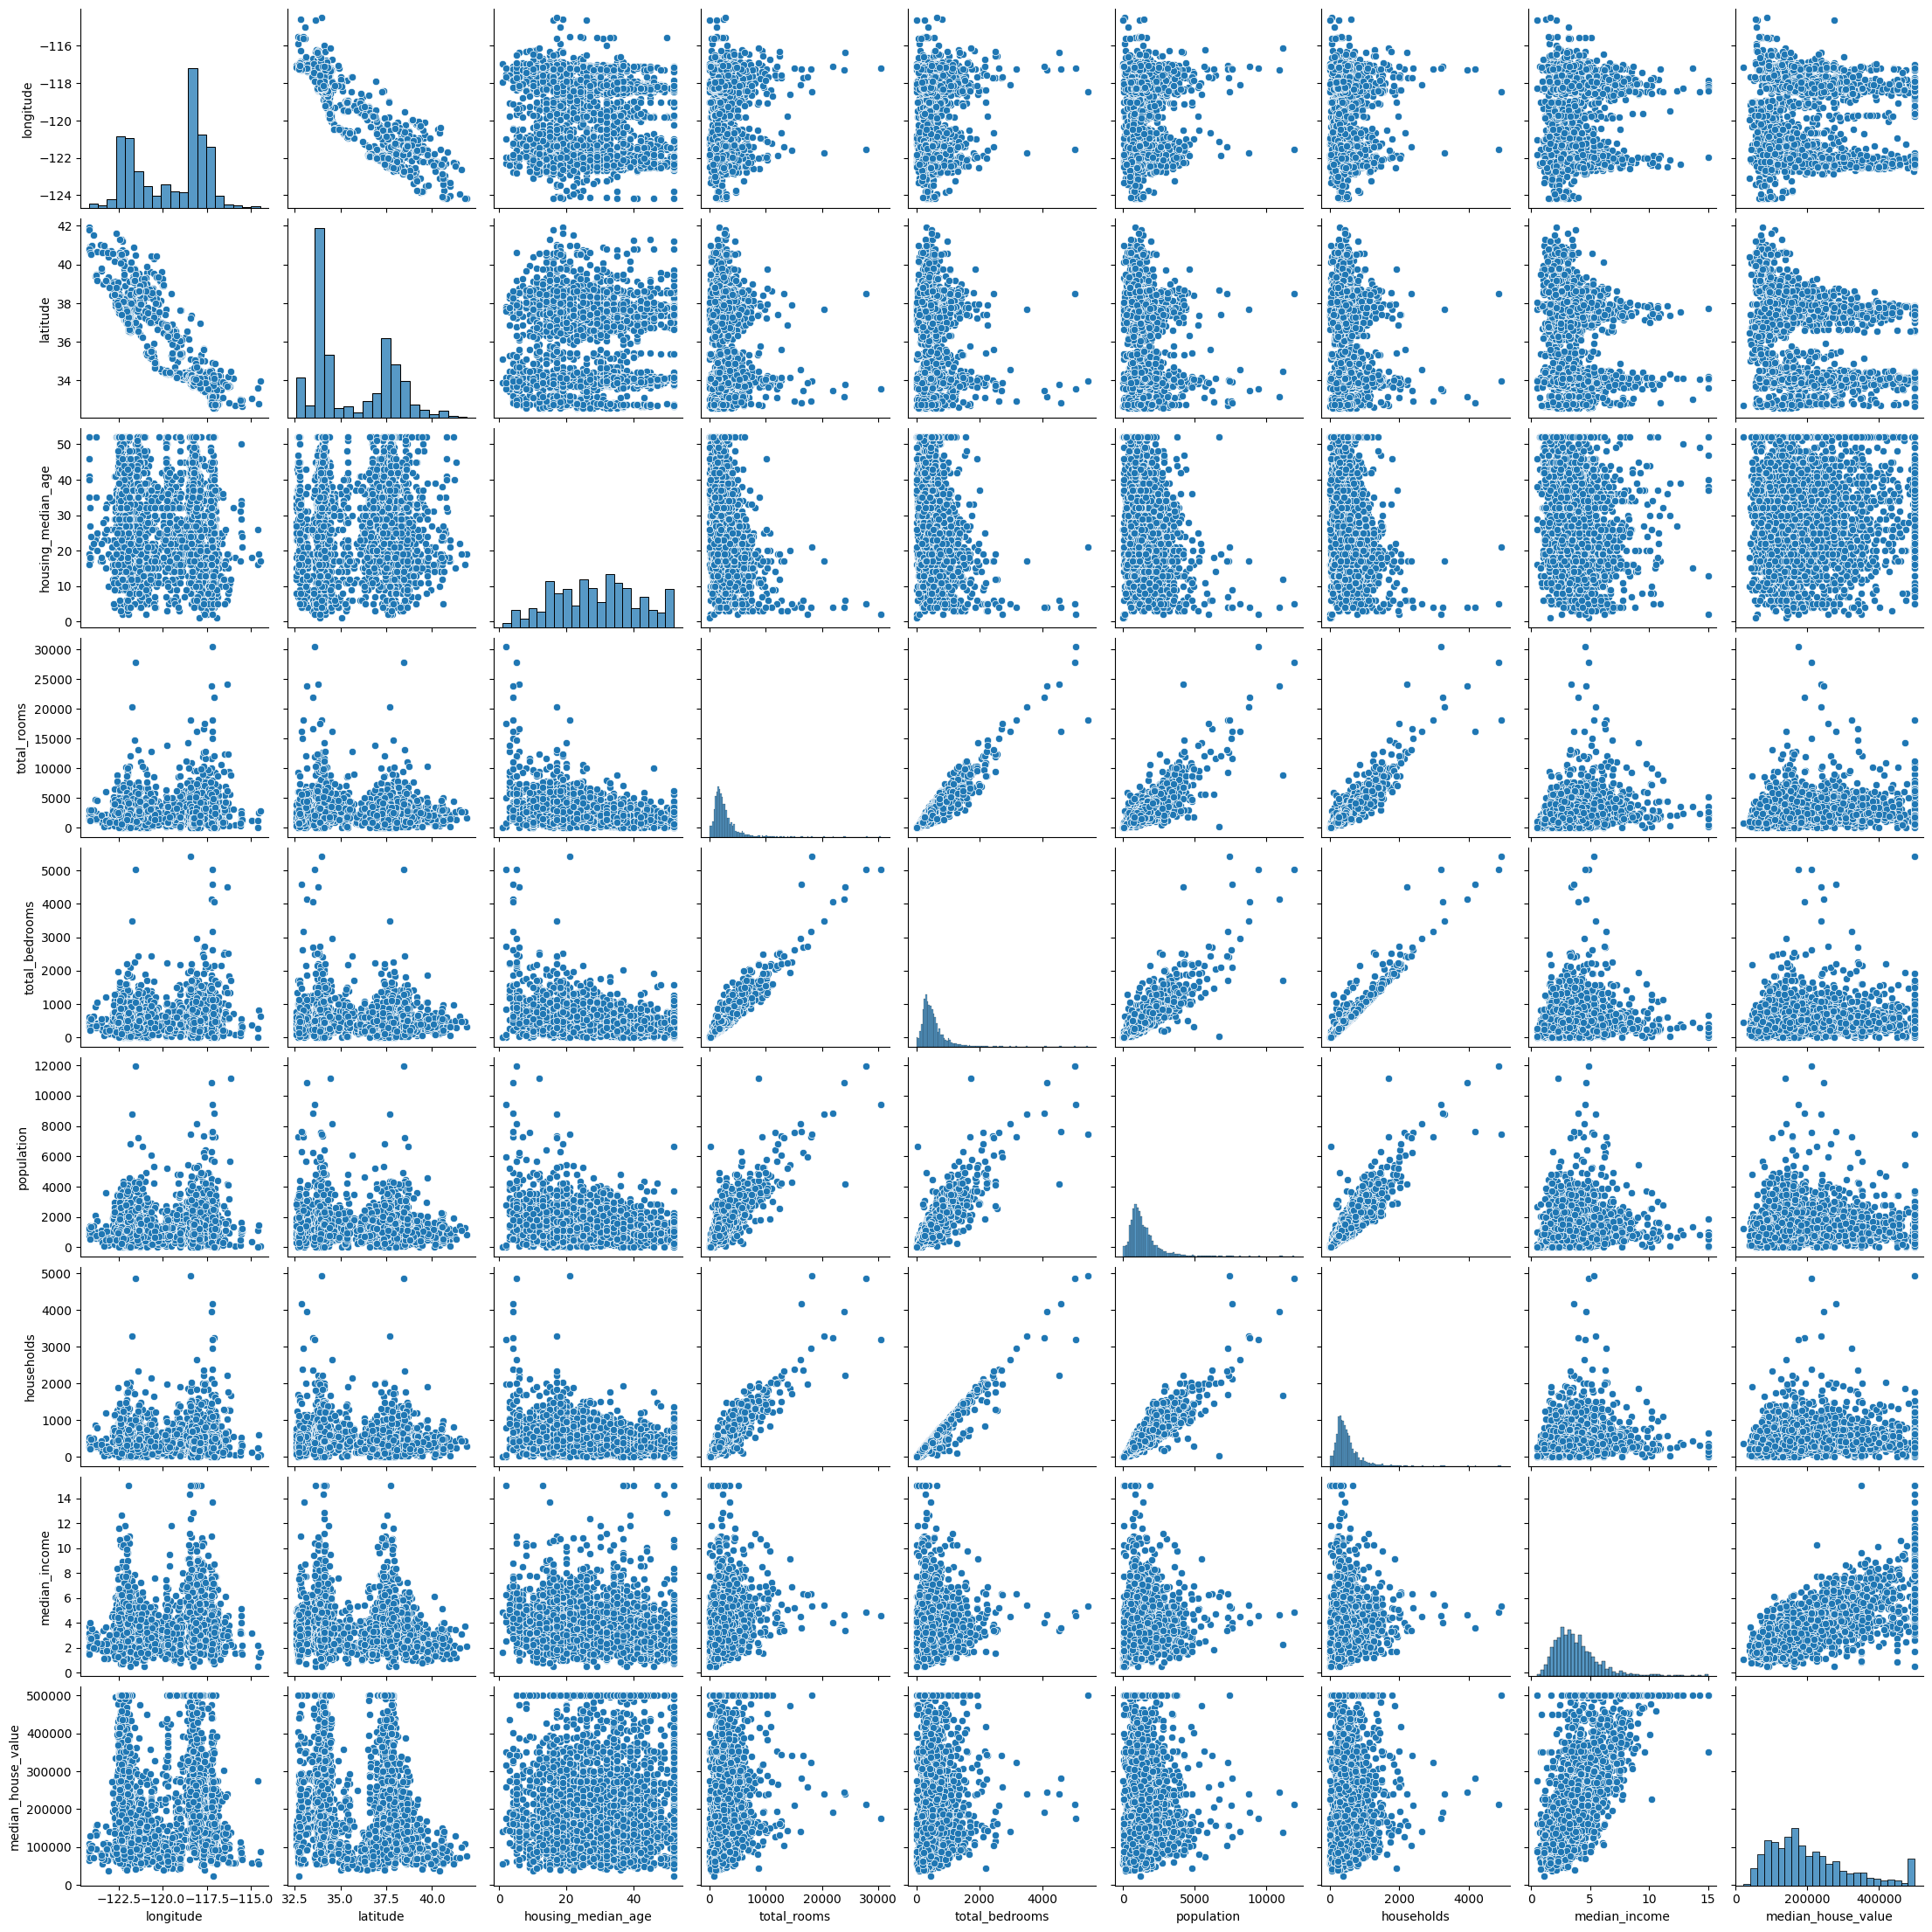

In [35]:
sns.pairplot(housing_data)

lets see housing median value vs housing median age using a histogram

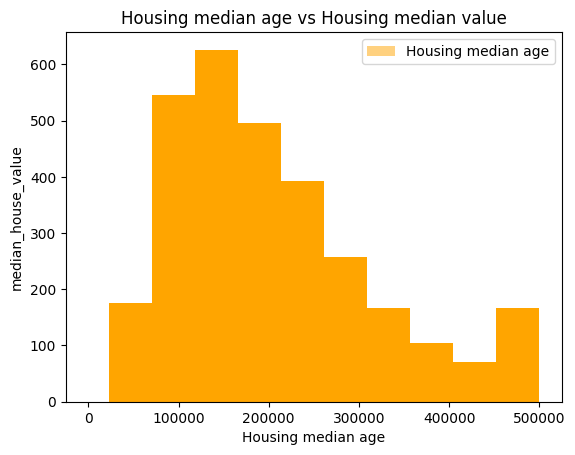

In [38]:
housing_median_age = housing_data['housing_median_age']
median_house_value = housing_data['median_house_value']

plt.hist(housing_median_age, color = "orange", label='Housing median age', alpha=0.5)
plt.hist(median_house_value, color = "orange")

plt.title('Housing median age vs Housing median value')
plt.xlabel('Housing median age')
plt.ylabel('median_house_value')
plt.legend(loc = "upper right")

lets see housing median value vs housing median age using a scatter plot

Text(0, 0.5, 'median_house_value')

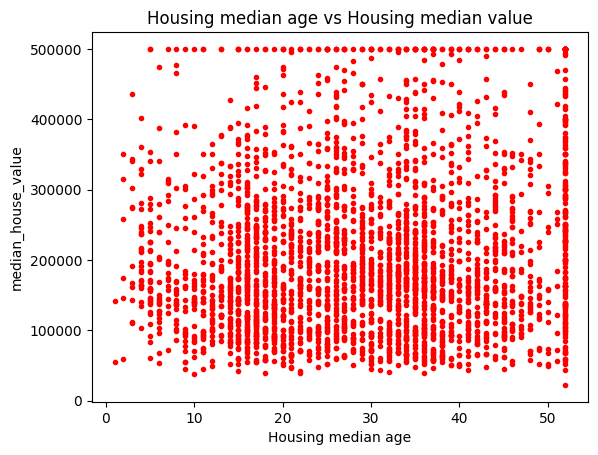

In [39]:
housing_median_age = housing_data['housing_median_age']
median_house_value = housing_data['median_house_value']

plt.scatter(housing_median_age, median_house_value, color = "red", marker = ".")
plt.title('Housing median age vs Housing median value')
plt.xlabel('Housing median age')
plt.ylabel('median_house_value')